In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
class Metropolis:
    def __init__(self,L,J=1,B=0):
        self.L = L
        self.N = L*L
        self.J = J
        self.B = B
        
        self.sc = np.ones(self.N,dtype=np.int0)
        self.prob = np.zeros(2,dtype=np.double)

    def prob_calc(self,beta):
        for i in range(2):
            # 4 8
            self.prob[i] = np.exp(-beta*4*(i+1))

    def measure(self,func):
        res = 0
        # print(self.sc)
        for i in range(self.N):
            sum = func(i)
            res += self.J*sum*self.sc[i]

        sigma = np.sum(self.sc)
        HH = -res -self.B*sigma

        return sigma, HH

    def helical(self,i):
        sum = 0

        nn = i + 1
        if(nn == self.N): nn = 0
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum

    
    def sweep_pbc(self,i):
        sum = 0

        nn = i -1
        if((nn+1 % self.L) == 0) : nn += self.L
        sum += self.sc[nn]

        nn = i + 1
        if(nn % self.L == 0): nn -= self.L
        sum += self.sc[nn]

        nn = i - self.L
        if(nn < 0): nn += self.N
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum
    
    def sweep_helical(self,i):
        sum = 0

        nn = i -1
        if(nn < 0) : nn += self.N
        sum += self.sc[nn]

        nn = i + 1
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]

        nn = i - self.L
        if(nn < 0): nn += self.N
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum

    def calculate(self):
        for i in range(self.N):
            k = np.random.randint(self.N)
            # delta = Enew - Eold
            delta = 2*self.sc[k]*self.J*self.sweep_helical(k)
            # print(delta)
            if(delta <= 0): # A = 1
                self.sc[k] *= -1
            elif(np.random.rand() < self.prob[int(delta/4)-1]): #flip
                # print(delta, self.prob[int(delta/4)-1])
                self.sc[k] *= -1
        return 2*self.sc[k], delta

In [88]:
temp = Metropolis(100)
temp.prob_calc(1/(2.4)) #beta = T^-1
temp.calculate()

(2, 8)

In [63]:
temp.prob

array([0.1888756 , 0.03567399])

In [64]:
np.exp(-1/(2.4)*8)

0.035673993347252395

In [ ]:
temp = Metropolis(100)
temp.prob_calc(1/(2.4)) #beta = T^-1
ls = [10,20,40,60,100,200,400,1000,2000,3000,4000,10000,100000]
cnt = 0
# i = 0
a = np.reshape(temp.sc,(temp.L,temp.L))
plt.imshow(a,cmap="gray")
plt.show()

for i in range(4001):
    if(i == ls[cnt]):
        cnt += 1
        a = np.reshape(temp.sc,(temp.L,temp.L))
        plt.imshow(a,cmap="Greys")
        print("cnt =",ls[cnt-1])
        plt.show()
    temp.calculate()

In [105]:
T = np.zeros(25,dtype=np.double)
m = np.zeros(25,dtype=np.double)
c = np.zeros(25,dtype=np.double)

for i in range(25):
    T[i] = 0.2*(i+1)

for j in range(25):
    M55 = Metropolis(100)
    M55.prob_calc(1/T[j])
    res = np.zeros(4,dtype=np.double)
    for i in range(2000):
        M55.calculate()
    sigma, HH = M55.measure(M55.helical)
    print(sigma,HH)
    for i in range(18000):
        M55.calculate()
        sigma, HH = M55.measure(M55.helical)
        res += np.array([np.absolute(sigma), sigma**2, HH, HH*HH])
    res /= 18000 
    m[j] = res[0]/M55.N
    c[j] = (1/T[j])**2*(res[3]-res[2]**2)/M55.N
    # print(m[j],c[j])


10000 -20000


KeyboardInterrupt: 

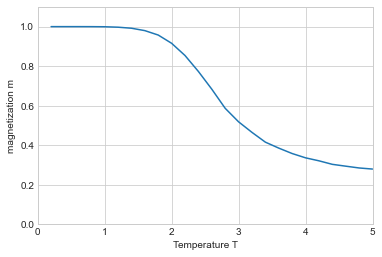

In [91]:
y = m/max(m)

plt.style.use('seaborn-whitegrid')
plt.ylim(0,1.1)
plt.xlim(0,5)
plt.plot(T,y)

plt.ylabel('magnetization m')
plt.xlabel('Temperature T')
plt.show()

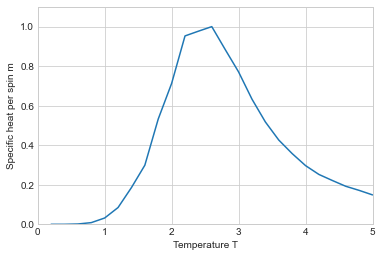

In [104]:
y = c/max(c)

plt.style.use('seaborn-whitegrid')
plt.ylim(0,1.1)
plt.xlim(0,5)
plt.plot(T,y)

plt.ylabel('Specific heat per spin m')
plt.xlabel('Temperature T')
plt.show()